# Project: TMDB Movie Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#limitations">Limitations</a></li>
</ul>

<a id='intro'></a>
## Introduction
> In this project, we will be analyzing data associated with movies that have been released all the way back in the 1960s till now. In particular, we will be investigating some important attributes such as the budget, popularity and revenue of the movies. In addition, we'll look at the number of users that rated each movie on IMDB and the average score for these movies.
>
> After an investigation of the dataset, the questions proposed will be:
<br />
>1- Which genre has been most produced in the last 10 years?
<br />
>2- How many movies have been released in each of the last 10 years?
<br />
>3- What kinds of properties are associated with movies that have high revenues?
<br />
>4- Does runtime affect the budget of the movie?
<br />
>5- Is there a relationship between popularity and average user score?
<br />
>6- What is the average budget for each genre?


In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [175]:
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [176]:
df.shape

(10866, 21)

In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

## Data Cleaning 
### 1- Unnecessary columns

>Columns: homepage, tagline, keywords and production_companies have many missing values. In addition, they are not of any use to the analysis, therefore these columns will be dropped with the overview, budget_adj and revenue_adj columns as they are of no interest to our analysis.

In [178]:
df.drop(columns=['homepage', 'keywords', 'overview', 'tagline', 'production_companies', 'budget_adj', 'revenue_adj'], inplace=True)

In [179]:
df.shape

(10866, 14)

### 2- Checking duplicates

In [180]:
sum(df.duplicated())

1

In [181]:
df.shape

(10866, 14)

In [182]:
df.drop_duplicates(keep='first',inplace=True)

In [183]:
df.shape

(10865, 14)

> There was only one duplicate row which was dropped while keeping the original row 

### 3- Adjusting data types

In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10865 non-null  int64  
 1   imdb_id         10855 non-null  object 
 2   popularity      10865 non-null  float64
 3   budget          10865 non-null  int64  
 4   revenue         10865 non-null  int64  
 5   original_title  10865 non-null  object 
 6   cast            10789 non-null  object 
 7   director        10821 non-null  object 
 8   runtime         10865 non-null  int64  
 9   genres          10842 non-null  object 
 10  release_date    10865 non-null  object 
 11  vote_count      10865 non-null  int64  
 12  vote_average    10865 non-null  float64
 13  release_year    10865 non-null  int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 1.2+ MB


> All data types are correct except for release_date which needs to be converted to datetime

In [185]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015


In [186]:
df['release_date'] = pd.to_datetime(df['release_date'])

In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              10865 non-null  int64         
 1   imdb_id         10855 non-null  object        
 2   popularity      10865 non-null  float64       
 3   budget          10865 non-null  int64         
 4   revenue         10865 non-null  int64         
 5   original_title  10865 non-null  object        
 6   cast            10789 non-null  object        
 7   director        10821 non-null  object        
 8   runtime         10865 non-null  int64         
 9   genres          10842 non-null  object        
 10  release_date    10865 non-null  datetime64[ns]
 11  vote_count      10865 non-null  int64         
 12  vote_average    10865 non-null  float64       
 13  release_year    10865 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(5)


> Using the pd.datetime function we managed to convert the data type to datetime

### 4- Dealing with missing values
>Since the columns which have missing values are categorical ones, it is much more difficult to impute their missing values. So I will only impute the missing values in genre and director columns by the most common value in each.

In [188]:
# Most common director
most_common_director = df.director.mode().str.cat(sep='')

In [189]:
df.director.fillna(most_common_director, inplace=True)

In [190]:
# Most common genre(s)
most_common_genres = df.genres.mode()
new_genre = most_common_genres.str.cat(sep='|')

In [191]:
df.genres.fillna(new_genre, inplace=True)

> With the mode function, the most frequent value was retrieved. But it is returned as a series object, therefore using the .str.cat() allows the series to be converted into a single string. A separator argument was also added to the latter function as the genres are separated by a '|'

> Finally rows of movies with missing cast values will be dropped

In [192]:
df.dropna(subset=['cast'], inplace = True)

In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10789 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              10789 non-null  int64         
 1   imdb_id         10779 non-null  object        
 2   popularity      10789 non-null  float64       
 3   budget          10789 non-null  int64         
 4   revenue         10789 non-null  int64         
 5   original_title  10789 non-null  object        
 6   cast            10789 non-null  object        
 7   director        10789 non-null  object        
 8   runtime         10789 non-null  int64         
 9   genres          10789 non-null  object        
 10  release_date    10789 non-null  datetime64[ns]
 11  vote_count      10789 non-null  int64         
 12  vote_average    10789 non-null  float64       
 13  release_year    10789 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(5)


### 5- Dealing with illogical/incorrect values (if any)

In [194]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,10789.000000,10789.000000,1.078900e+04,1.078900e+04,10789.000000,10789.000000,10789.000000,10789.000000
mean,65647.665400,0.649943,1.472523e+07,4.010415e+07,102.346835,218.726666,5.968607,2001.289369
std,91819.227889,1.002792,3.099937e+07,1.173725e+08,30.998457,577.446810,0.932325,12.815476
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000
25%,10567.000000,0.209655,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000
50%,20497.000000,0.385492,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000
75%,74726.000000,0.718275,1.600000e+07,2.463747e+07,112.000000,147.000000,6.600000,2011.000000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000


> Here we can see that for the budget, revenue and runtime, we have 0 as the minimum value which are not possible for any movie

In [195]:
df['runtime'] = df['runtime'].replace([0], int(df.runtime.median()))

In [196]:
df.budget.median()

0.0

In [197]:
df.budget.mean()

14725230.491426453

In [198]:
df['budget'] = df['budget'].replace([0], int(df.budget.mean()))

In [199]:
df.revenue.median()

0.0

In [200]:
df.revenue.mean()

40104153.647882104

In [201]:
df['revenue'] = df['revenue'].replace([0], int(df.revenue.mean()))

> The safe option was to fill all zero values with the median of the respective column instead of the mean in order to avoid factoring in outliers. I managed to do so in the runtime but the median of budget and revenue was zero so instead I filled the zeros with the mean there.

In [202]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,10789.000000,10789.000000,1.078900e+04,1.078900e+04,10789.000000,10789.000000,10789.000000,10789.000000
mean,65647.665400,0.649943,2.241063e+07,6.220251e+07,102.631291,218.726666,5.968607,2001.289369
std,91819.227889,1.002792,2.808399e+07,1.113624e+08,30.508284,577.446810,0.932325,12.815476
min,5.000000,0.000065,1.000000e+00,2.000000e+00,2.000000,10.000000,1.500000,1960.000000
25%,10567.000000,0.209655,1.472523e+07,4.010415e+07,90.000000,17.000000,5.400000,1995.000000
50%,20497.000000,0.385492,1.472523e+07,4.010415e+07,99.000000,38.000000,6.000000,2006.000000
75%,74726.000000,0.718275,1.600000e+07,4.010415e+07,112.000000,147.000000,6.600000,2011.000000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000


In [237]:
df[df['revenue'] < 10]

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year
1380,18196,tt0076683,0.097126,14725230,3,The Sentinel,Chris Sarandon|Cristina Raines|Martin Balsam|J...,Michael Winner,92,Horror|Drama|Mystery,1977-01-07,14,6.3,1977
3239,14301,tt1227926,0.352054,200000,3,Dr. Horrible's Sing-Along Blog,Neil Patrick Harris|Nathan Fillion|Felicia Day...,Joss Whedon,42,Adventure|Action|Comedy|Science Fiction|Music,2008-07-15,140,7.7,2008
3283,53955,tt1038142,0.113082,14725230,9,Parlami D'Amore,Silvio Muccino|Aitana SÃ¡nchez-GijÃ³n|Carolina...,Silvio Muccino,109,Comedy|Romance,2008-02-14,11,5.1,2008
5067,13537,tt0323944,0.462609,6000000,2,Shattered Glass,Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...,Billy Ray,94,Drama|History,2003-11-14,46,6.4,2003
5162,24914,tt0368574,0.208637,10,5,Kid's Story,Clayton Watson|Keanu Reeves|Carrie-Anne Moss|K...,Shinichiro Watanabe,15,Science Fiction|Animation,2003-06-02,16,6.8,2003
8142,2293,tt0113749,0.552091,6000000,2,Mallrats,Jason Lee|Jeremy London|Shannen Doherty|Claire...,Kevin Smith,94,Romance|Comedy,1995-10-20,201,6.8,1995
8226,48781,tt0113965,0.183034,6400000,6,Never Talk to Strangers,Rebecca De Mornay|Antonio Banderas|Dennis Mill...,Peter Hall,86,Thriller|Romance,1995-10-20,15,4.5,1995
8328,16219,tt0104346,0.291459,14725230,9,Gladiator,James Marshall|Cuba Gooding Jr.|Robert Loggia|...,Rowdy Herrington,101,Action|Drama,1992-03-06,10,5.1,1992
8523,9431,tt0117826,0.578849,15000000,5,Bordello of Blood,Dennis Miller|Erika Eleniak|Angie Everhart|Joh...,Gilbert Adler,87,Horror|Comedy,1996-08-16,27,4.9,1996
10307,2259,tt0107151,0.450208,25000000,6,The House of the Spirits,Meryl Streep|Glenn Close|Jeremy Irons|Winona R...,Bille August,140,Romance|Drama,1993-10-19,52,6.7,1993


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### 1- Which genre has been most produced in the last 10 years?

In [204]:
last_ten_years = df[df['release_year'] > 2004] # Retrieve all rows with release year starting from 2005

>Since each value in the genres column may contain multiple genres, the approach here is to add each genre in each value of the 
genres column to an array and count the number of occurrences of the unique genres.

In [205]:
# Since genres column may have multiple genres inside one value, we will split the genres such that each single one will be in a separate column
genres_split = last_ten_years['genres'].str.split(pat="|", expand=True)

In [206]:
genres_split.head(3)

,0,1,2,3,4
0,Action,Adventure,Science Fiction,Thriller,None
1,Action,Adventure,Science Fiction,Thriller,None
2,Adventure,Science Fiction,Thriller,None,None


In [208]:
# Add the resulted dataframe to our current one
df_with_split_genres = pd.concat([last_ten_years, genres_split], axis=1)

In [209]:
df_with_split_genres.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,0,1,2,3,4
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,Action,Adventure,Science Fiction,Thriller,None
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,Action,Adventure,Science Fiction,Thriller,None


#### No need to rename those split genres columns as they will serve one purpose and we will not use them again

In [213]:
# Finally, pd.melt() will allow us to have one final genre column where the value in each of the 5 genre columns
# will be added in one row of that final column 
final_df = pd.melt(df_with_split_genres, id_vars=['id'], value_vars=[0, 1, 2, 3, 4])

In [214]:
final_df.head(6)

,id,variable,value
0,135397,0,Action
1,76341,0,Action
2,262500,0,Adventure
3,140607,0,Action
4,168259,0,Action
5,281957,0,Western


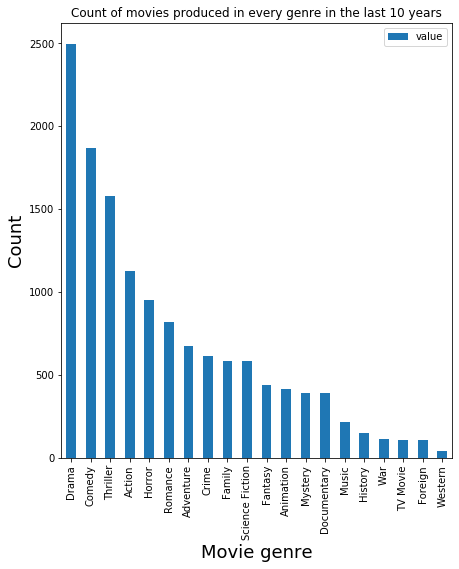

In [164]:
final_df['value'].value_counts().plot(title='Count of movies produced in every genre in the last 10 years', legend=True,figsize=(7,8), kind='bar');
plt.xlabel('Movie genre', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.show()

#### As we can see, Drama has been the most produced with over 2500 movies and following are Comedy & Thriller genres with over 1500 movies

### 2- How many movies have been released in each of the last 10 years?

In [159]:
last_ten_years.sort_values(by=['release_year']) #Sort the release years

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
6508,9288,tt0406728,0.138467,14725230,40104153,Dungeons & Dragons: Wrath of the Dragon God,Bruce Payne|Mark Dymond|Clemency Burton-Hill|E...,Gerry Lively,105,Action|Adventure|Fantasy,2005-01-01,12,5.1,2005,0.000000e+00,0.000000e+00
6436,19495,tt0374089,0.270053,25000000,40104153,Nomad,Kuno Becker|Jay Hernandez|Jason Scott Lee|Dosk...,Sergei Bodrov Jr.|Ivan Passer,112,Action|History|War,2005-07-17,11,3.9,2005,2.791408e+07,0.000000e+00
6435,2610,tt0338427,0.270403,10284523,11588205,Shopgirl,Steve Martin|Claire Danes|Jason Schwartzman|Br...,Anand Tucker,104,Comedy|Drama|Romance,2005-10-21,31,5.8,2005,1.148332e+07,1.293896e+07
6434,6473,tt0457090,0.376497,14725230,40104153,The Marksman,Wesley Snipes|Emma Samms|William Hope|Anthony ...,Marcus Adams,95,Action|Adventure|Thriller,2005-01-01,16,4.1,2005,0.000000e+00,0.000000e+00
6433,28366,tt0435026,0.265732,14725230,40104153,House of Fury,Anthony Wong|Stephen Fung|Charlene Choi|Gillia...,Stephen Fung,102,Action|Comedy|Foreign,2005-03-31,18,6.4,2005,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,226458,tt1945044,0.256286,14725230,40104153,Backmask,Stephen Lang|Kelly Blatz|Brittany Curran|Gage ...,Marcus Nispel,91,Thriller|Horror,2015-01-16,46,4.6,2015,0.000000e+00,0.000000e+00
411,306966,tt2638662,0.256542,14725230,40104153,Summer Camp,Maiara Walsh|Diego Boneta|Jocelin Donahue|Andr...,Alberto Marini,81,Horror,2015-08-30,16,5.3,2015,0.000000e+00,0.000000e+00
410,339342,tt2948712,0.097514,14725230,40104153,Anarchy Parlor,Robert LaSardo|Jordan James Smith|Sara Fabel|T...,Kenny Gage|Devon Downs,99,Horror,2015-01-01,15,5.6,2015,0.000000e+00,0.000000e+00
417,326284,tt3488328,0.248280,7500000,40104153,Pound of Flesh,Jean-Claude Van Damme|John Ralston|Darren Shah...,Ernie Barbarash,104,Action,2015-05-07,42,5.4,2015,6.899997e+06,0.000000e+00


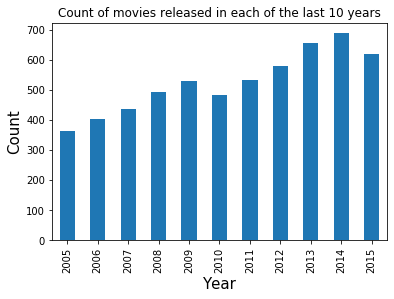

In [226]:
last_ten_years.release_year.value_counts(sort=False).sort_index().plot(kind='bar');
plt.xlabel('Year', fontsize=15);
plt.ylabel('Count', fontsize=15);
plt.title('Count of movies released in each of the last 10 years');

>We can see almost a trend that the number of movies is increasing almost every year

### 3- What kinds of properties are associated with movies that have high revenues?

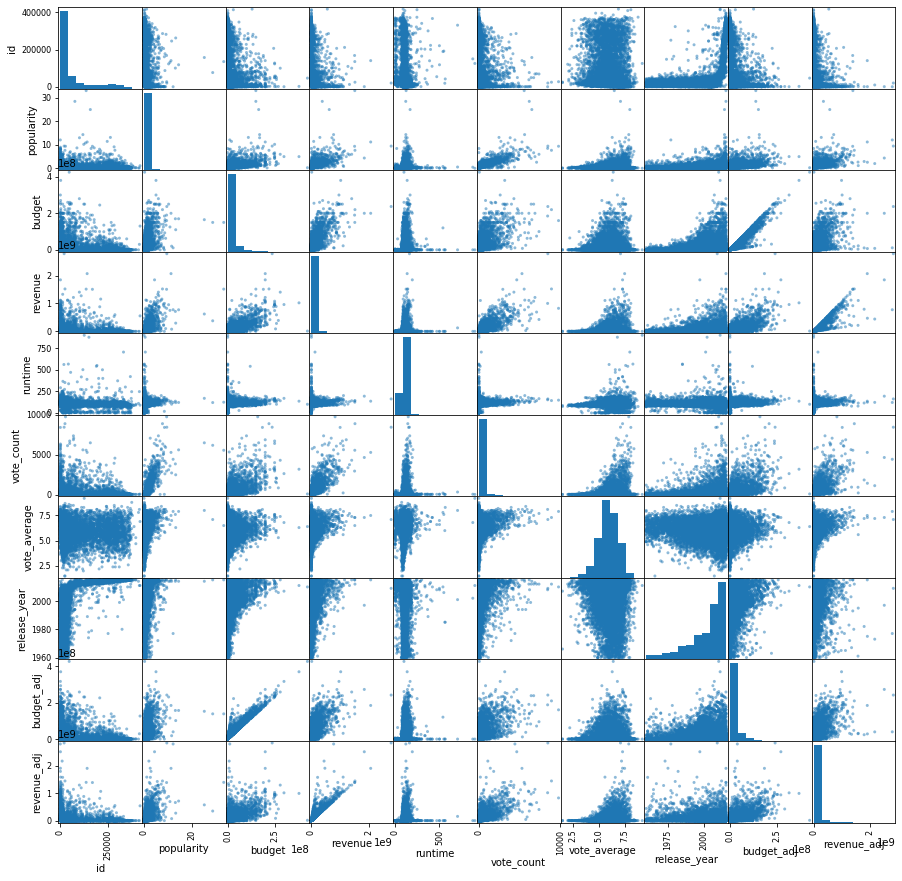

In [115]:
pd.plotting.scatter_matrix(df, figsize=(15,15));

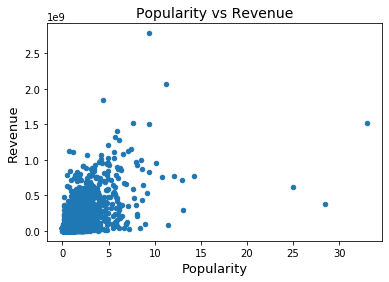

In [221]:
df.plot(x='popularity', y='revenue', kind='scatter');
plt.xlabel('Popularity', fontsize=13);
plt.ylabel('Revenue', fontsize=13);
plt.title('Popularity vs Revenue', fontsize=14);

> Revenue has a very high positive correlation with popularity

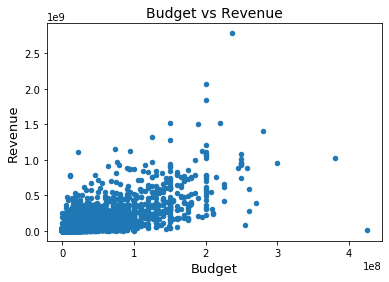

In [225]:
df.plot(x='budget', y='revenue', kind='scatter');
plt.xlabel('Budget', fontsize=13);
plt.ylabel('Revenue', fontsize=13);
plt.title('Budget vs Revenue',fontsize=14);

> Revenue has a high positive correlation with budget

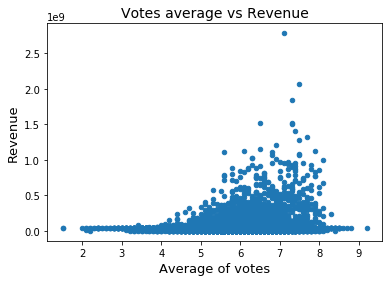

In [224]:
df.plot(x='vote_average', y='revenue', kind='scatter');
plt.xlabel('Average of votes', fontsize=13);
plt.ylabel('Revenue', fontsize=13);
plt.title('Votes average vs Revenue',fontsize=14);

> Revenue has a positive correlation with average of votes

### 4- Does runtime affect the budget of the movie?

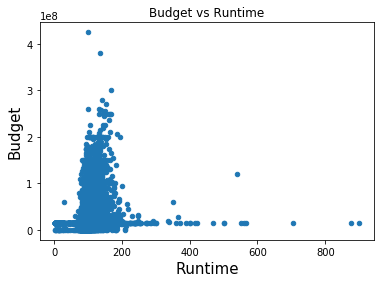

In [172]:
df.plot(x='runtime', y='budget', kind='scatter');
plt.xlabel('Runtime', fontsize=15)
plt.ylabel('Budget', fontsize=15)
plt.title('Budget vs Runtime')
plt.show()

> The budget is not affected by the runtime/duration of the movie

### 5- Is there a relationship between popularity and average user score?

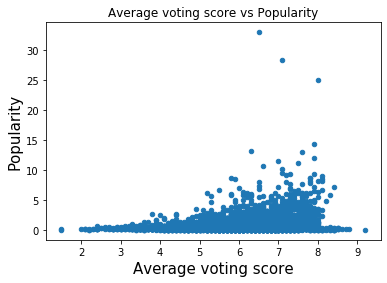

In [173]:
df.plot(x='vote_average', y='popularity', kind='scatter');
plt.xlabel('Average voting score', fontsize=15)
plt.ylabel('Popularity', fontsize=15)
plt.title('Average voting score vs Popularity')
plt.show()

> We can see a slight positive correlation. Therefore, the higher the user score for the movie, the more popular the movie is.

### 6- What is the average budget for each genre?

#### Following on the lines of code written in the 1st question, we can use the dataframe which had the 5 genre columns which were resulted from splitting the original genres column. The difference here is that the id column will be the budget

In [227]:
# Finally, pd.melt() will allow us to have one final genre column where the value in each of the 5 genre columns
# will be added in one row of that final column 
final_budget_df = pd.melt(df_with_split_genres, id_vars=['budget'], value_vars=[0, 1, 2, 3, 4])

In [233]:
final_budget_df.head(5)

,budget,variable,value
0,150000000,0,Action
1,150000000,0,Action
2,110000000,0,Adventure
3,200000000,0,Action
4,190000000,0,Action


Text(0.5, 1.0, 'Average budget for each genre')

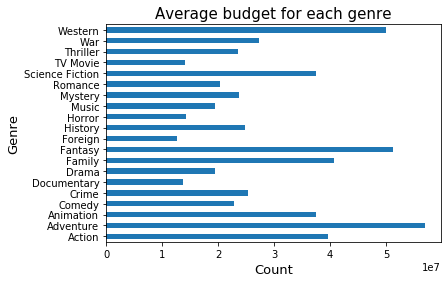

In [232]:
final_budget_df.groupby('value')['budget'].mean().plot(kind='barh')
plt.xlabel('Count', fontsize=13)
plt.ylabel('Genre', fontsize=13)
plt.title('Average budget for each genre', fontsize=15)

> So as we can see, Adventure movies have the highest budget with an average of over 55000000 pounds with Fantasy & Western movies coming in behind with over 50000000 pounds

<a id='conclusions'></a>
## Conclusions

### So to summarize: 
> In the last 10 years, Drama has been the most produced movie genre with over 2500 movies and following are Comedy & Thriller genres with over 1500 movies.

> Also there is a noticeable gradual increase in the number of movies being produced every year in the last 10 years

> We have seen that movies with high revenue are usually movies that have high popularity, high budget and high score vote from users

> We have seen that surprising movie duration/runtime does not affect the budget of the movie

> Average user score for a movie positively affects the popularity of the movie

> Finally, Adventure movies have the highest budget with an average of over 55000000 pounds with Fantasy & Western movies coming in behind with over 50000000 pounds

### Limitations:

> 1- Inability to impute 10 imdb_id column values that were missing so I left them as they are as I figured they will not affect my exploration and analysis

> 2- There were budget values that are of a single or double digits which does not make sense. This might have affected the analysis when finding the average budget for example for every genre in the sixth question

> 3- Also there were revenue values of single digit which also does not make sense. But luckily, that did not affect in the analysis of the six questions